In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#----------------------------------#dataset 1-------------------------------------------#
X1 =  hours_week = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
Y1 = kg_muscle_gain =np.array([3.1, 5.0, 7.2, 8.9, 11.2, 12.8, 15.2, 17.1, 19.2, 21.0])

#----------------------------------#dataset 2-------------------------------------------#
X2 = load_kg = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]).reshape(-1, 1)
Y2 = strength_score = np.array([-20.5, -15.2, -7.6, -0.8, 3.2, 2.1, 4.7, 6.0, 4.9, 1.6, -3.8])

#Your tasks
#1)📈 Plot the data (scatter plot) for each dataset and decide visually what kind of pattern it shows
#2)🔍 If the pattern looks linear, fit Linear Regression; if it looks curved, fit Polynomial Regression (degree=2)
#3)📊 For both models: Calc and print MSE, R²
#4)📉 For Polynomial Regression only: Calc and print Adjusted R²
#5)📈 Draw the graph of the regression line + observation points for the Linear Regression
#6)📈 Draw the graph of the regression parabola + observation points for the Polynoial Regression
#7)Predict (using model.predict) the value of 4.5 hours in the first model, and 0.5 load-kg in the second model

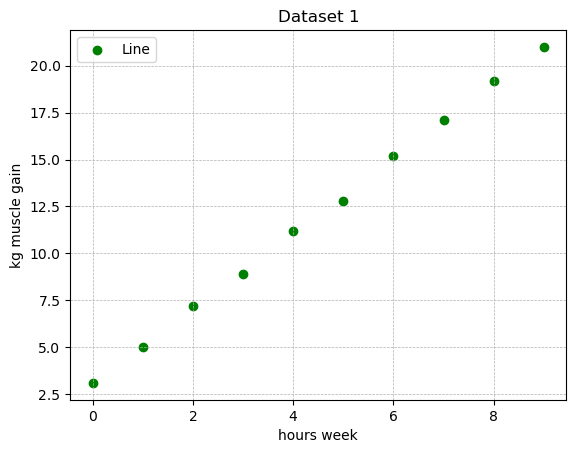

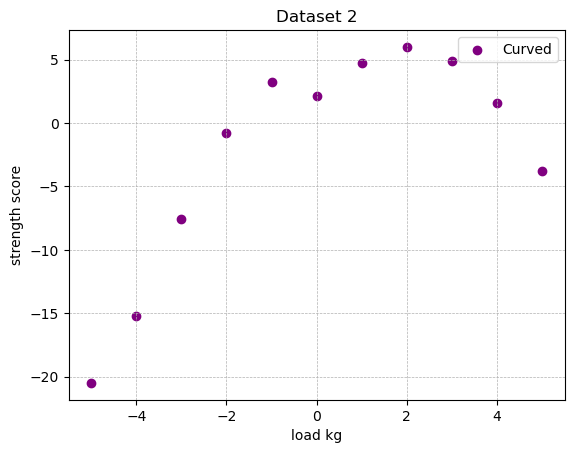

In [3]:
#1)📈 Plot the data (scatter plot) for each dataset and decide visually what kind of pattern it shows

def scatter(ttle,x,y,clr,xlbl,ylv,lbl):
    plt.figure()
    plt.title(ttle)
    plt.scatter(x,y,color=clr,label=lbl)
    plt.grid(linestyle='--',linewidth=0.5)
    plt.xlabel(xlbl)
    plt.ylabel(ylv)
    plt.legend()

scatter('Dataset 1',X1,Y1,'green','hours week','kg muscle gain','Line')
scatter('Dataset 2',X2,Y2,'purple','load kg','strength score','Curved')

In [4]:
#2)🔍 If the pattern looks linear, fit Linear Regression; if it looks curved, fit Polynomial Regression (degree=2)
#----------------------------------#dataset 1-------------------------------------------#
model1 = LinearRegression()
model1.fit(X1,Y1)


#----------------------------------#dataset 2-------------------------------------------#
poly = PolynomialFeatures(degree=2)
X2_poly = poly.fit_transform(X2)
model2 = LinearRegression()
model2.fit(X2_poly, Y2)

LinearRegression()

In [5]:
#3)📊 For both models: Calc and print MSE, R²
def MSE_Rsqr(Y,X,mod,title):
    Y_pred=mod.predict(X)
    print(title)
    print(f'MSE = {np.mean((Y - Y_pred)**2)}')
    print(f'Rsqr = {r2_score(Y,Y_pred)}\n')
    
MSE_Rsqr(Y1,X1,model1,'_____DataSet#1(line)_____')
MSE_Rsqr(Y2,X2_poly,model2,'_____DataSet#2(curv)_____')

_____DataSet#1(line)_____
MSE = 0.01802424242424249
Rsqr = 0.9994557585602966

_____DataSet#2(curv)_____
MSE = 1.3413019707565168
Rsqr = 0.9807079862229945



In [6]:
#4)📉 For Polynomial Regression only: Calc and print Adjusted R²
Rsqr=0.9807079862229945 #מהתרגיל הקודם
n=X2_poly.shape[0]
p=X2_poly.shape[1]
Adjusted_R2 = 1 - (1 - Rsqr) * (n - 1) / (n - p - 1)
print(f' Adjusted R² = {Adjusted_R2}')

 Adjusted R² = 0.9724399803185636


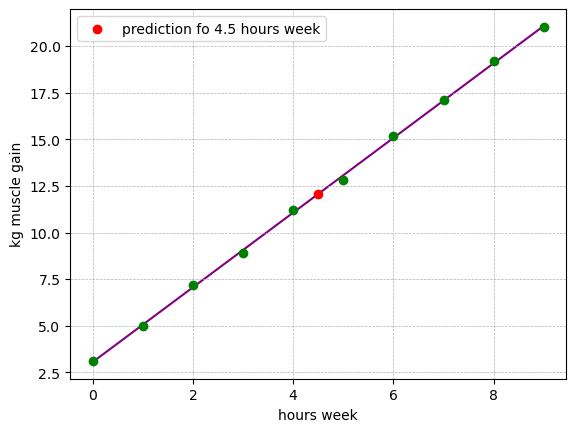

In [7]:
#5)📈 Draw the graph of the regression line + observation points for the Linear Regression
a=model1.coef_
b=model1.intercept_
y1=a*X1+b



plt.scatter(X1,Y1,color='green',zorder=2)
plt.plot(X1,y1,color='purple',zorder=1)
plt.grid(linestyle='--',linewidth=0.5)
plt.xlabel('hours week')
plt.ylabel('kg muscle gain')
plt.scatter(4.5,12.07,color='red',zorder=2,label='prediction fo 4.5 hours week')#targil num7
plt.legend()

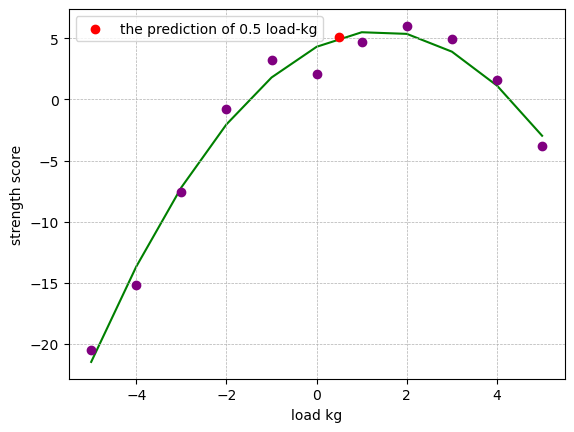

In [8]:
#6)📈 Draw the graph of the regression parabola + observation points for the Polynoial Regression
a=model2.coef_
b=model2.intercept_
y2=a[1]*X2+a[2]*X2**2+b

plt.plot(X2,y2,color='green',zorder=1)
plt.scatter(X2,Y2,zorder=2,color='purple')
plt.xlabel('load kg')
plt.ylabel('strength score')
plt.grid(linestyle='--',linewidth=0.5)
plt.scatter(0.5,5.05477273,zorder=2,color='red',label='the prediction of 0.5 load-kg')#targil num7
plt.legend()

In [9]:
#7)Predict (using model.predict) the value of 4.5 hours in the first model, and 0.5 load-kg in the second model
#first model
y1_predict=model1.predict(np.array(4.5).reshape(-1, 1))
print(f'the predictionvalue of 4.5 hours in the first mode = {y1_predict}')

#second model
new_x=np.array(0.5).reshape(-1, 1)
x_new_poly = poly.transform(new_x)
y2_predict=model2.predict(x_new_poly)
print(f'the prediction value of 0.5 load-kg in the second model = {y2_predict}')


the predictionvalue of 4.5 hours in the first mode = [12.07]
the prediction value of 0.5 load-kg in the second model = [5.05477273]


### 🧾 8. What’s the Difference Between `model.score` and the `r2_score` Function?

Both functions calculate **R²**, but they differ in how you use them:

- With **`model.score(X, y)`**, you **don’t need** to calculate predictions manually — it does that for you internally.  
- With **`r2_score(Y, Y_pred)`**, you **first have to calculate** the predictions using `model.predict(X)` in order to get the values for `Y_pred`.

---

### 🎯 Why Do We Need to Calculate Adjusted R² Instead of Just Relying on R²?

**R²** measures how well the model fits the data, and it generally increases as more features are added — even if those features don’t actually improve the model.  

**Adjusted R²** also measures model fit, but it accounts for the **number and quality of the features**, preventing overfitting by penalizing unnecessary ones.

---

### 🌀 In the Parabola Function \( y = aX² + bX + c \), Explain How Each Parameter Affects the Shape and Position of the Parabola

- **a** controls the curvature of the parabola:  
  - If \( a < 0 \), the parabola opens downward (a **bell** shape).  
  - If \( a > 0 \), it opens upward (a **bowl** shape).  

- **b** affects the **horizontal position** of the vertex — it determines where the highest or lowest point sits along the **x-axis** (left/right).  

- **c** controls the **vertical position** — it moves the parabola **up or down** along the **y-axis**.

---

### 🧮 Considering Your Previous Answer, Why Does `PolynomialFeatures` Create 3 Features?

`PolynomialFeatures` creates **three features** — `[1, x, x²]` — which allow a **linear regression model** to learn and represent **curved relationships**, such as a **parabola**.

---

### 🧱 In `PolynomialFeatures(degree = 2)`, the First Feature Is Always 1 — Why Do We Need It?

The first feature is always **1** because it allows the model to include an **intercept term**.  
Without this feature, the intercept would always be fixed at **(0, 0)**, and the model wouldn’t be able to shift vertically to fit the data properly.
